## Decision Tree Algorithm

In [1]:
import numpy as np 
import pandas as pd

In [47]:
df = pd.read_csv("Admission_Predict.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [48]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

### Removing Unwanted columns

In [49]:
df = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ']]


In [50]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


### Adding the decision result

In [56]:
out_s = []
for index, row in df.iterrows():
    if row['Chance of Admit '] >= 0.75 :
        out_s.append(1)
    else:
        out_s.append(0)
df['outcome'] = out_s

In [57]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,outcome
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,1
2,316,104,3,3.0,3.5,8.00,1,0.72,0
3,322,110,3,3.5,2.5,8.67,1,0.80,1
4,314,103,2,2.0,3.0,8.21,0,0.65,0
...,...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82,1
396,325,107,3,3.0,3.5,9.11,1,0.84,1
397,330,116,4,5.0,4.5,9.45,1,0.91,1
398,312,103,3,3.5,4.0,8.78,0,0.67,0


In [58]:
x = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ']]
y = df['outcome']

### Splitting the dataset into train-test

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state =42)

### Training Decision Tree Model

In [60]:
from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [68]:
y_test_predict = model.predict(x_test)

### Evaluate the model

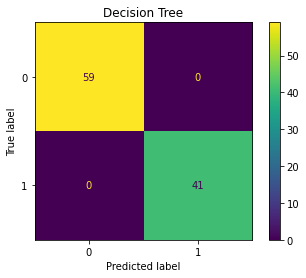

Accuracy Score is : 1.0
Classification Report is :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        41

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [69]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_test_predict)
plt.title('Decision Tree')
plt.show()
print(f"Accuracy Score is : {accuracy_score(y_test,y_test_predict)}")
print(f"Classification Report is : {classification_report(y_test,y_test_predict)}")

### Ploting the decision tree

[Text(0.5, 0.75, 'Chance of Admit  <= 0.745\ngini = 0.497\nsamples = 300\nvalue = [161, 139]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 161\nvalue = [161, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 139\nvalue = [0, 139]')]

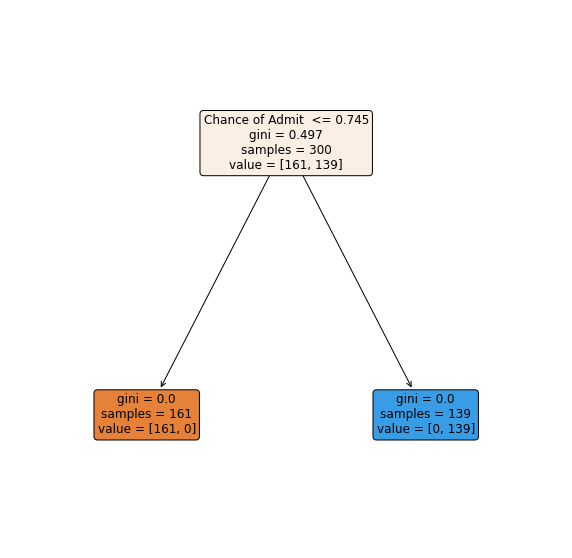

In [73]:
from sklearn.tree import plot_tree
plt.figure(figsize = (10,10))
plot_tree(model,fontsize=12,filled=True,rounded=True,feature_names=x.columns)